# Домашнее задание №1


Задание присылать на обе почты почты **aleksartamonov@gmail.com**  **dashkov.alexander.om@gmail.com** в виде ссылки на colab

В теме письма указать ***CV_HSE_2021 HW1 <Фамилия Имя>***

soft deadline: 14.02.2021T23:59:00+0300

hard deadline: 21.02.2021T23:59:00+0300

## Теоретический блок

##### Задача 1 (3 балла)

Когда Вы заходите в темную комнату из светлого помещения, то проходит некоторое время, прежде чем Вы станете видеть достаточно хорошо, чтобы различить очертания предметов. Какая из обсуждавшихся на лекции особенностей зрительного восприятия человека объясняет это явление? Какой процесс происходит в зрительной системе?

> Глаз переключается с фотопического зрения на скотопическое. Другими словами, в светлом помещении основой зрения является работа рецепторов-колбочек, которые расположены в середине глаза и способны различать цвета. А в тёмном помещении, основой зрения является работа рецепторов-палочек, которые расположены на переферии глаза. Они более чувствительны, что позволяет ориентироваться в темноте. Однако смена рецепторов не мгновенный процесс, он может занимать до получаса, поэтому при смене комнату мы не сразу начинаем различать очертания предметов.

##### Задача 2 (3 балла)

Рассмотрим некоторое цветовое пространство $R_{new}G_{new}B_{new}$, получающееся из исходного RGB по правилу:

$$
R_{new} = a_{11}R+a_{12}G+a_{13}B+a_{14}\\
G_{new} = a_{21}R+a_{22}G+a_{23}B+a_{24}\\
B_{new} = a_{31}R+a_{32}G+a_{33}B+a_{34}
$$

где R, G и B – вещественные числа от 0 до 1. 

Какими свойствами должны обладать коэффициенты $a_{ij}$, чтобы можно было без потерь информации переходить из одного пространства в другое и обратно?
(*) Какими свойствами должны обладать коэффициенты $a_{ij}$ , чтобы вещественные числа $R_{new},G_{new}$ и $B_{new}$ тоже лежали внутри куба со стороной 1 и полностью плотно его заполняли?

Заметим, что данную систему уравнений можно записать в матричном виде:
$$
\begin{pmatrix}
R_{new} \\ G_{new} \\ B_{new}
\end{pmatrix}
= A
\begin{pmatrix}
R \\ G \\ B
\end{pmatrix}
+ b
$$
Тогда обратное преобразование будет выглядеть:
$$
\begin{pmatrix}
R \\ G \\ B
\end{pmatrix}
= A^{-1} \Big(\begin{pmatrix}
R_{new} \\ G_{new} \\ B_{new}
\end{pmatrix} - b \Big)
$$

Таким образом матрица $A$ должна быть обратимой, то есть её определитель должен быть ненулевым.

Необходимо, чтобы после преобразования вещественные числа $R_{new}$, $G_{new}$ и $B_{new}$ остались лежать в кубе со стороной $1$ и полность его заполняли, как это было с $R$, $G$ и $B$. Другими словами, преобразование должно быть либо поворотом исходного пространства, либо какое-то симметричное отражение. Таким образом, необходимо чтобы преобразование было ортогональным.

## Практический блок

In [1]:
from itertools import permutations

import cv2
import matplotlib.pylab as plt
import numpy as np

%matplotlib inline

In [2]:
def show_image(img: np.ndarray, cmap=None, cvt=None):
    plt.axis("off")
    if cvt is not None:
        img = cv2.cvtColor(img, cvt)
    plt.imshow(img, cmap=cmap)
    plt.show()
    
def print_images_diff(img1: np.ndarray, img2: np.ndarray):
    diff = np.abs(img1.astype(np.float32) - img2.astype(np.float32))
    print(f"Max difference: {diff.max():.3f}\nMean difference: {diff.mean():.3f}")
    show_image(diff.astype(np.uint8), cvt=cv2.COLOR_BGR2RGB)

##### Задача 3 (3 балла)

Загрузите изображение *lena.jpg* в переменную **lena**. Отобразите результат на экран.

In [3]:
## your code here
lena = cv2.imread("lena.png")

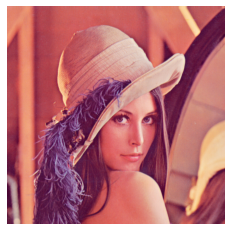

In [4]:
show_image(lena, cvt=cv2.COLOR_BGR2RGB)

##### Задача 4 (3 балла)

Поменяйте местами левую верхнюю и правую нижнюю четвертинки изображения **lena** и отобразите результат на экран.

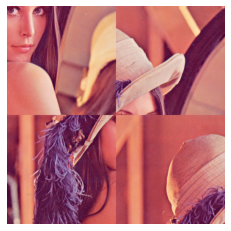

In [5]:
## your code here
height, width, channels = lena.shape
lena_quatered = lena.copy()
lena_quatered[:height // 2, :width // 2] = lena[height // 2:, width // 2:]
lena_quatered[height // 2:, width // 2:] = lena[:height // 2, :width // 2]

show_image(lena_quatered, cvt=cv2.COLOR_BGR2RGB)

##### Задача 5 (3 балла)

Усредните значения всех трех цветовых каналов **lena** в каждый из каналов итогового изображения **lena_gray_my**.

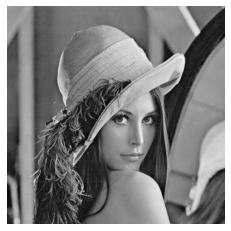

In [6]:
## your code here
lena_gray_my = lena.astype(np.float32).mean(axis=2).astype(np.uint8)

show_image(lena_gray_my, cmap="gray")

##### Задача 6 (3 балла)

Переведите исходное цветное изображение **lena** в изображение в градациях серого с помощью функции cvtColor. (**lena_gray_cvt**). Вычислите модуль разности между изображениями **lena_gray_my** и **lena_gray_cvt** и отобразите ее на экране.

Max difference: 39.000
Mean difference: 5.661


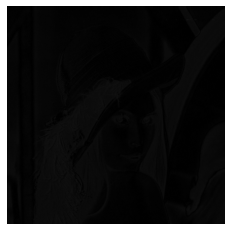

In [7]:
## your code here
lena_gray_cvt = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)

print_images_diff(lena_gray_my, lena_gray_cvt)

##### Задача 7 (3 балла)

Переведите исходное изображение **lena** из RGB в HSV. Установите значения S и V в максимум для всех пикселей изображения. Полученное изображение переведите обратно в RGB. Отобразите результат.

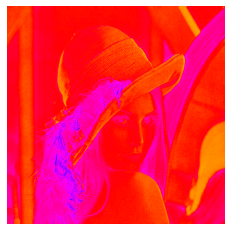

In [8]:
## your code here
lena_hsv = cv2.cvtColor(lena, cv2.COLOR_BGR2HSV)
lena_hsv[:, :, 1:] = 255
lena_bgr = cv2.cvtColor(lena_hsv, cv2.COLOR_HSV2BGR)

show_image(lena_bgr, cvt=cv2.COLOR_BGR2RGB)

##### Задача 8 (3 балла)
Переведите изображение **lena** в одно из цветовых пространств (cvtColor) с выделенной координатой яркости (HSV, HSL, HSB, CIE Lab), инвертируйте яркостную составляющую, переведите обратно в RGB. Отобразите результат.

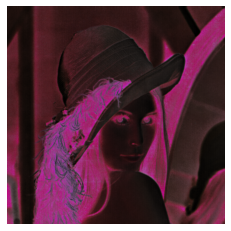

In [9]:
## your code here
lena_hls = cv2.cvtColor(lena, cv2.COLOR_BGR2HSV)
lena_hls[:, :, 2] = 255 - lena_hls[:, :, 2]
lena_bgr = cv2.cvtColor(lena_hls, cv2.COLOR_HSV2BGR)

show_image(lena_bgr, cvt=cv2.COLOR_BGR2RGB)

##### Задача 9 (3 балла)

По цветному изображению **lena** на входе сгенерируйте 6 цветных изображений, полученных путем перестановки значений цветовых каналов r, g и b. исходного изображения. Соберите коллаж $3x2$ и отобразите его на экране. 

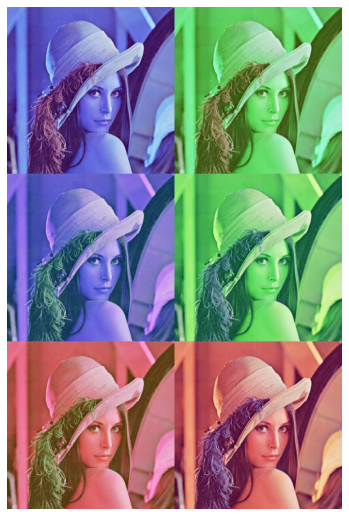

In [10]:
## your code here
collage = np.empty((3 * height, 2 * width, channels), dtype=np.uint8)

for i, channel_order in enumerate(permutations(range(channels))):
    row, col = i // 2, i % 2
    collage[row * height:(row + 1) * height, col * width: (col + 1) * width] = lena[:, :, channel_order]

plt.figure(figsize=(6, 10))
show_image(collage)

##### Задача 10 (3 балла)
Переведите изображение **lena** из RGB в CIE Lab при помощи встроенной функции OpenCV. Загрузите исходное иображение еще раз и переведите из RGB в CIE Lab самостоятельно с помощью формул (google it). Сравните полученные изображения, построив разницу между ними. (Должен получится ~0)

In [11]:
def gamma_normalization(img: np.ndarray) -> np.ndarray:
    img = img.astype(np.float32) / 255
    mask = img > 0.04045
    img[mask] = np.power(((img[mask] + 0.055) / 1.055), 2.4)
    img[~mask] = img[~mask] / 12.92
    return img

def rgb2xyz(rgb_img: np.ndarray) -> np.ndarray:
    conv_matrix = np.array([
        [0.4124564, 0.3575761, 0.1804375],
        [0.2126729, 0.7151522, 0.0721750],
        [0.0193339, 0.1191920, 0.9503041]
    ])
    orig_shape = rgb_img.shape
    rgb_norm_img = gamma_normalization(rgb_img)
    xyz_img = rgb_norm_img.reshape(-1, 3).dot(conv_matrix.T).reshape(orig_shape)
    return xyz_img

def xyz2cielab(xyz_img: np.ndarray) -> np.ndarray:
    def f(img: np.ndarray, eps: float = 0.008856, k: float = 903.3):
        mask = img > eps
        new_img = np.empty_like(img)
        new_img[mask] = np.power(img[mask], 1. / 3)
        new_img[~mask] = (k * img[~mask] + 16) / 116
        return new_img
    
    xyz_img = xyz_img.copy()
    xyz_img[:, :, 0] /= 0.950456
    xyz_img[:, :, 2] /= 1.088754

    f_img = f(xyz_img)
    L = 116 * f_img[:, :, 1] - 16
    a = 500 * (f_img[:, :, 0] - f_img[:, :, 1])
    b = 200 * (f_img[:, :, 1] - f_img[:, :, 2])

    # Convert to OpenCV format
    L *= 2.55
    a += 128
    b += 128

    return np.stack((L, a, b), axis=-1).astype(np.uint8)

def bgr2cielab(bgr_img: np.ndarray) -> np.ndarray:
    rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
    xyz_img = rgb2xyz(rgb_img)
    lab_img = xyz2cielab(xyz_img)
    return lab_img

Max difference: 2.000
Mean difference: 0.532


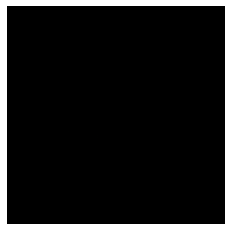

In [12]:
## your code here
lena_cie_cvt = cv2.cvtColor(lena, cv2.COLOR_BGR2Lab)
lena_cie_my = bgr2cielab(lena)

print_images_diff(lena_cie_my, lena_cie_cvt)